<a href="https://colab.research.google.com/github/Pal208194/SCT_ML_3/blob/main/mall12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e045ecf76bec>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data['Square_Footage'] = housing_data['Avg_Rooms'] * 100  # Rough estimate
<ipython-input-1-e045ecf76bec>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data['Bathrooms'] = (housing_data['Avg_Rooms'] - housing_data['Avg_Bedrooms']).apply(lambda x: max(1, round(x)))
<ipython-input-1-e045ecf76bec>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Dataset information:
Number of samples: 20640

First 5 rows:
   Square_Footage  Bedrooms  Bathrooms     Price
0      698.412698         1          6  452600.0
1      623.813708         1          5  358500.0
2      828.813559         1          7  352100.0
3      581.735160         1          5  341300.0
4      628.185328         1          5  342200.0

Descriptive statistics:
       Square_Footage      Bedrooms     Bathrooms          Price
count    20640.000000  20640.000000  20640.000000   20640.000000
mean       542.899974      1.045494      4.329312  206855.816909
std        247.417314      0.474061      2.104709  115395.615874
min         84.615385      1.000000      1.000000   14999.000000
25%        444.071624      1.000000      3.000000  119600.000000
50%        522.912879      1.000000      4.000000  179700.000000
75%        605.238095      1.000000      5.000000  264725.000000
max      14190.909091     34.000000    116.000000  500001.000000

Training linear regression model..

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


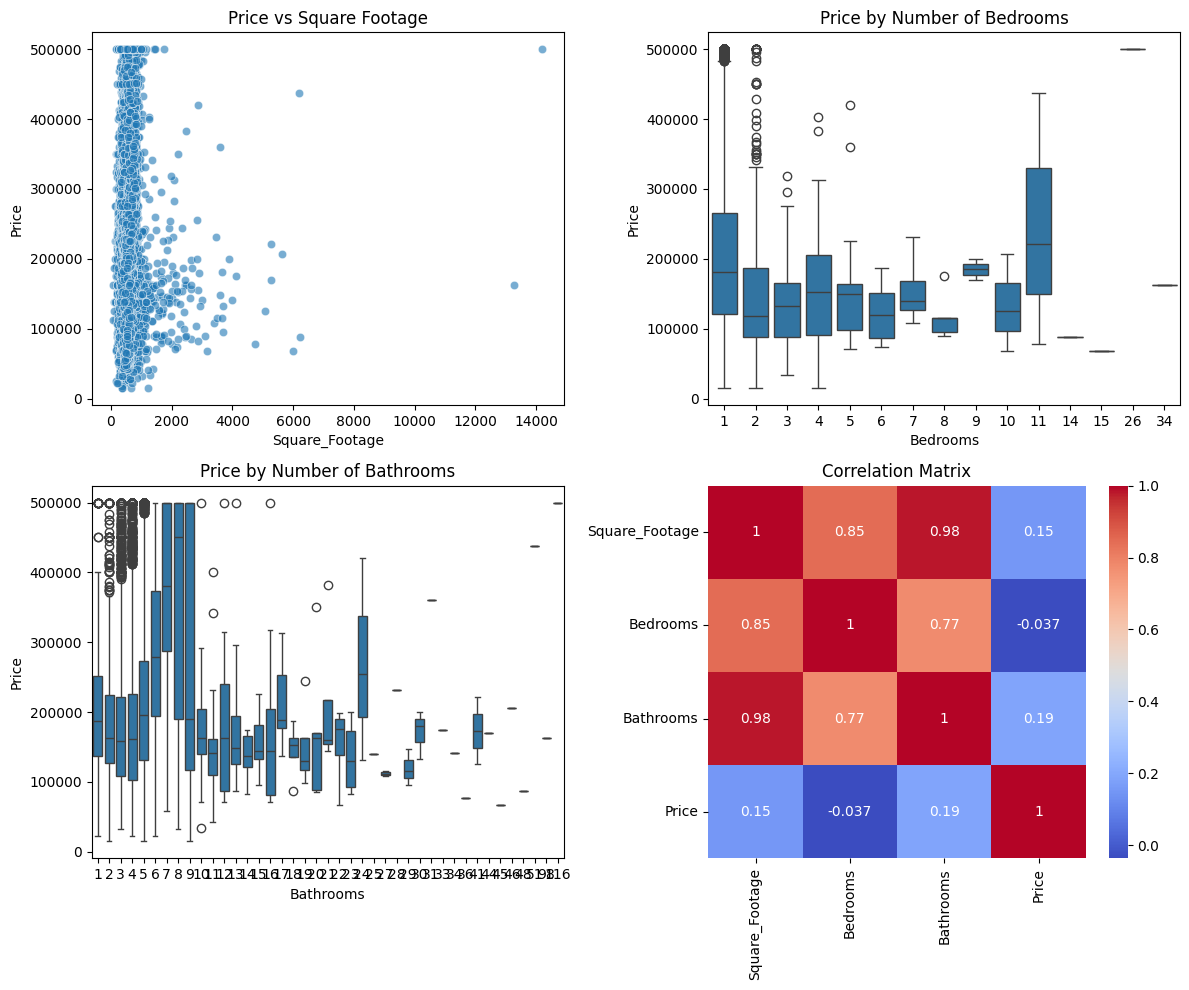

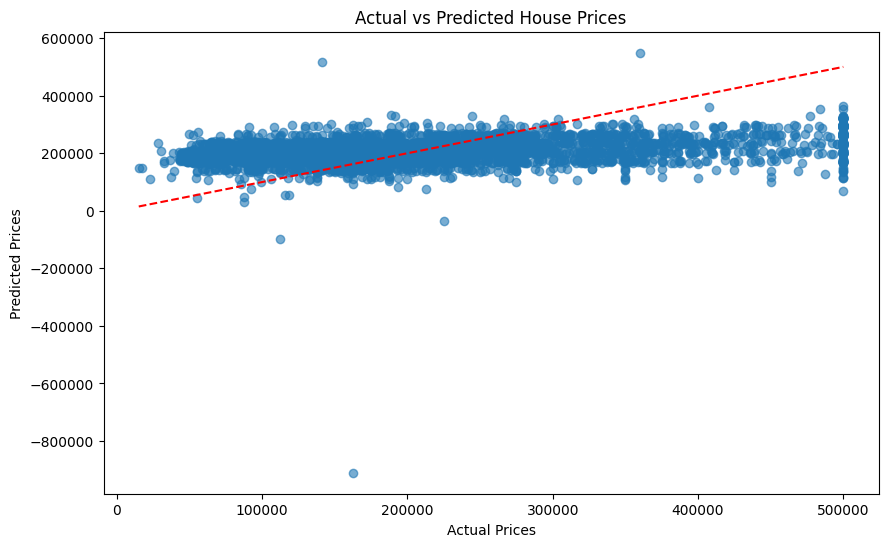

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Function to load or generate housing dataset
def load_housing_data():
    """
    Load the California housing dataset or generate synthetic data if unavailable
    """
    try:
        # Try loading the California Housing dataset
        california = fetch_california_housing()

        # Create a DataFrame
        data = pd.DataFrame(california.data, columns=california.feature_names)
        data['PRICE'] = california.target * 100000  # Convert to actual prices (originally in $100k)

        # Select relevant features
        housing_data = data[['MedInc', 'AveRooms', 'AveBedrms', 'PRICE']]
        housing_data.columns = ['Median_Income', 'Avg_Rooms', 'Avg_Bedrooms', 'Price']

        # For simplicity, we'll interpret:
        # - Avg_Rooms as total rooms (including bathrooms)
        # - Avg_Bedrooms as bedrooms
        # - We'll derive bathrooms as Rooms - Bedrooms (simplified assumption)
        housing_data['Square_Footage'] = housing_data['Avg_Rooms'] * 100  # Rough estimate
        housing_data['Bathrooms'] = (housing_data['Avg_Rooms'] - housing_data['Avg_Bedrooms']).apply(lambda x: max(1, round(x)))
        housing_data['Bedrooms'] = housing_data['Avg_Bedrooms'].apply(lambda x: max(1, round(x)))

        # Select final features
        return housing_data[['Square_Footage', 'Bedrooms', 'Bathrooms', 'Price']]

    except:
        # If dataset is unavailable, generate synthetic data
        print("Using synthetic housing data...")
        np.random.seed(42)
        n_samples = 1000

        # Generate realistic features
        square_footage = np.random.normal(1500, 500, n_samples).astype(int)
        bedrooms = np.random.randint(1, 6, n_samples)
        bathrooms = np.random.randint(1, 4, n_samples)

        # Generate prices based on features with some noise
        price = (
            100 * square_footage +
            10000 * bedrooms +
            15000 * bathrooms +
            np.random.normal(0, 20000, n_samples)
        )

        # Create DataFrame
        housing_data = pd.DataFrame({
            'Square_Footage': square_footage,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Price': price
        })

        return housing_data

# Main function for house price prediction
def predict_house_prices():
    # Load or generate dataset
    housing_data = load_housing_data()

    print("Dataset information:")
    print(f"Number of samples: {len(housing_data)}")
    print("\nFirst 5 rows:")
    print(housing_data.head())

    print("\nDescriptive statistics:")
    print(housing_data.describe())

    # Visualize feature relationships
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    sns.scatterplot(x='Square_Footage', y='Price', data=housing_data, alpha=0.6)
    plt.title('Price vs Square Footage')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='Bedrooms', y='Price', data=housing_data)
    plt.title('Price by Number of Bedrooms')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='Bathrooms', y='Price', data=housing_data)
    plt.title('Price by Number of Bathrooms')

    plt.subplot(2, 2, 4)
    correlation = housing_data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')

    plt.tight_layout()
    plt.savefig('housing_data_visualization.png')

    # Prepare data for modeling
    X = housing_data[['Square_Footage', 'Bedrooms', 'Bathrooms']]
    y = housing_data['Price']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the model
    print("\nTraining linear regression model...")
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Evaluation:")
    print(f"Mean Squared Error: ${mse:.2f}")
    print(f"Root Mean Squared Error: ${rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Display coefficients
    print("\nModel Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: ${coef:.2f}")
    print(f"Intercept: ${model.intercept_:.2f}")

    # Visualize actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted House Prices')
    plt.savefig('actual_vs_predicted.png')

    # Function to predict price for new data
    def predict_price(square_footage, bedrooms, bathrooms):
        new_data = np.array([[square_footage, bedrooms, bathrooms]])
        new_data_scaled = scaler.transform(new_data)
        predicted_price = model.predict(new_data_scaled)[0]
        return predicted_price

    # Example predictions
    print("\nExample Predictions:")
    example_houses = [
        (1200, 2, 1),
        (1800, 3, 2),
        (2500, 4, 2.5),
        (3000, 5, 3),
    ]

    for sq_ft, bed, bath in example_houses:
        price = predict_price(sq_ft, bed, bath)
        print(f"House with {sq_ft} sq ft, {bed} bedrooms, {bath} bathrooms: ${price:.2f}")

    return model, scaler

# Run the model
if __name__ == "__main__":
    model, scaler = predict_house_prices()

    # Interactive prediction function
    def interactive_prediction():
        print("\n===== House Price Predictor =====")
        print("Enter house details to get a price prediction (or 'q' to quit):")

        while True:
            try:
                sq_ft_input = input("\nSquare Footage: ")
                if sq_ft_input.lower() == 'q':
                    break

                sq_ft = float(sq_ft_input)
                bedrooms = float(input("Number of Bedrooms: "))
                bathrooms = float(input("Number of Bathrooms: "))

                # Scale the input
                new_data = np.array([[sq_ft, bedrooms, bathrooms]])
                new_data_scaled = scaler.transform(new_data)

                # Make prediction
                predicted_price = model.predict(new_data_scaled)[0]

                print(f"\nPredicted House Price: ${predicted_price:.2f}")

            except ValueError:
                print("Please enter valid numbers or 'q' to quit.")
            except Exception as e:
                print(f"An error occurred: {e}")

    # Uncomment to enable interactive predictions
    # interactive_prediction()